In [ ]:
import pandas as pd
import numpy as np

from glob import glob # Access the files and stores in list format
import cv2
import matplotlib.pylab as plt

### Reading Images

In [7]:
dog_files = glob("dogs/*.jpg")
cat_files = glob("cats/*.jpg")

In [9]:
img_mpl = plt.imread(cat_files[20])
img_cv2 = cv2.imread(cat_files[20])

In [11]:
img_mpl.shape, img_cv2.shape

((499, 350, 3), (499, 350, 3))

<Axes: title={'center': 'Distribution of pixel values'}, ylabel='Frequency'>

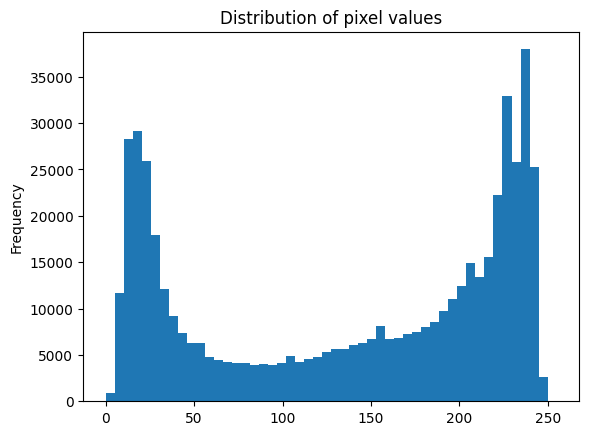

In [14]:
pd.Series(img_mpl.flatten()).plot(kind='hist', bins=50, title='Distribution of pixel values')

### Displaying Images

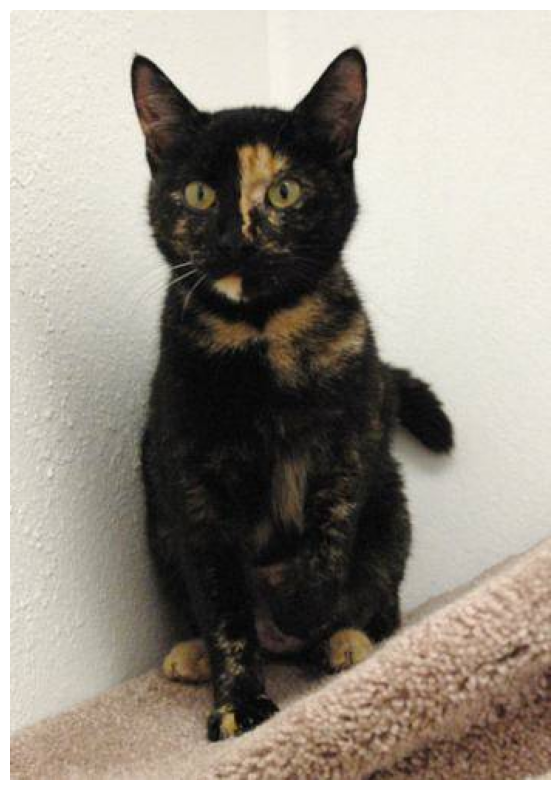

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(img_mpl)
ax.axis('off')
plt.show()

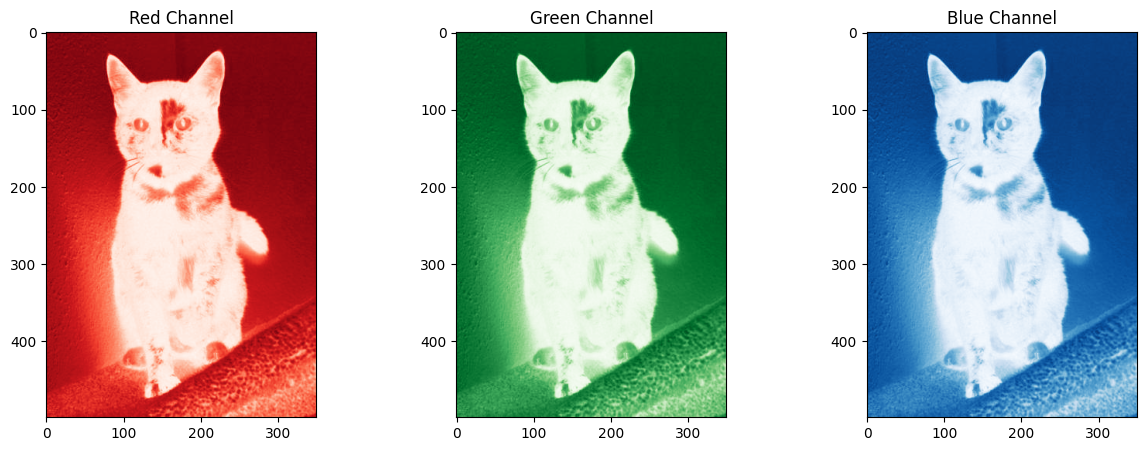

In [26]:
# Displaying RGB channels of our image

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(img_mpl[:,:,0], cmap='Reds')
ax[1].imshow(img_mpl[:,:,0], cmap='Greens')
ax[2].imshow(img_mpl[:,:,0], cmap='Blues')
ax[0].set_title('Red Channel')
ax[1].set_title('Green Channel')
ax[2].set_title('Blue Channel')
plt.show()

## Matplotlib vs CV2

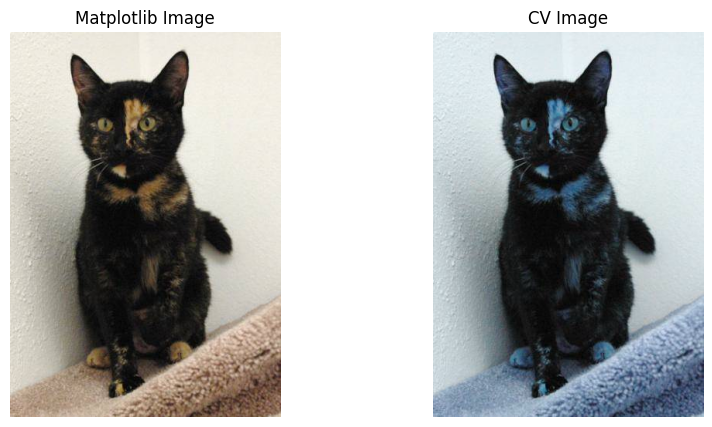

In [27]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(img_mpl)
ax[1].imshow(img_cv2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('Matplotlib Image')
ax[1].set_title('CV Image')
plt.show()

The difference in the images between matplotlib and cv2 because matplotlib reads in channels as RGB were as cv2 reads in channels as BGR

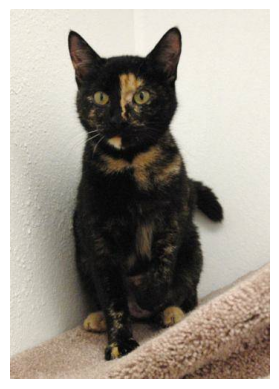

In [28]:
# converting BGR to RGB
img_cv2_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(img_cv2_rgb)
ax.axis('off')
plt.show()

# Image Manipulation

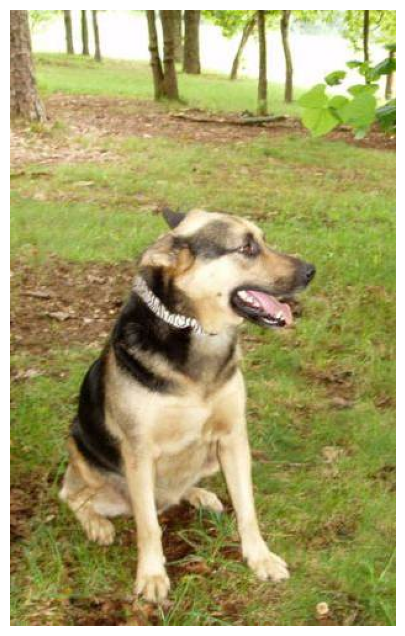

In [29]:
img = plt.imread(dog_files[4])
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img)
ax.axis('off')
plt.show()

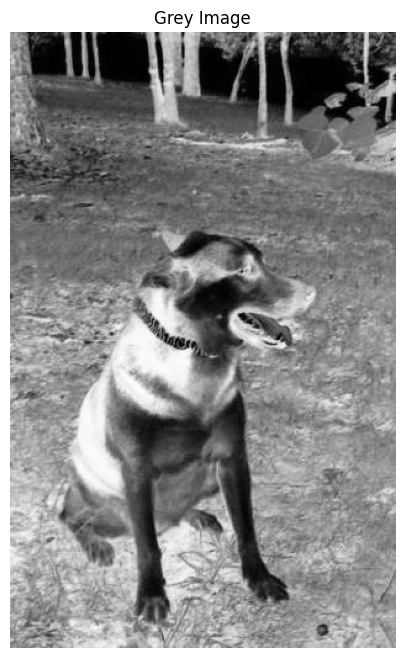

In [30]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

#Resizing and Scaling

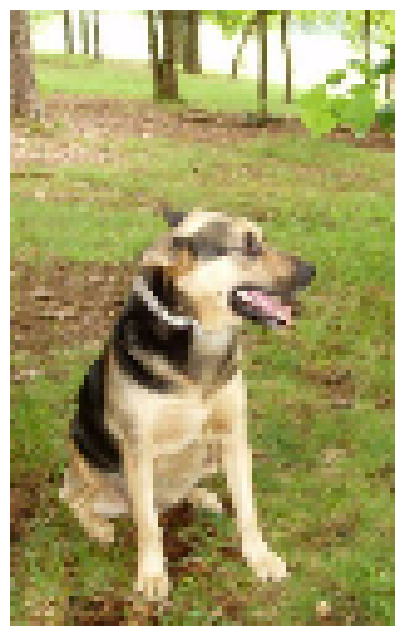

In [31]:
img_resized = cv2.resize(img, None, fx=0.25, fy=0.25)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

In [32]:
img.shape, img_resized.shape

((500, 313, 3), (125, 78, 3))

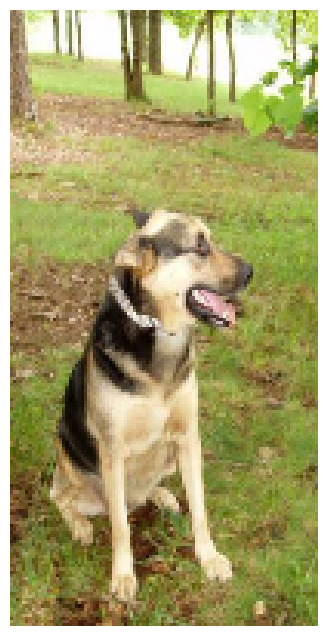

In [33]:
img_resized = cv2.resize(img, (100,200))
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

In [34]:
img.shape, img_resized.shape

((500, 313, 3), (200, 100, 3))

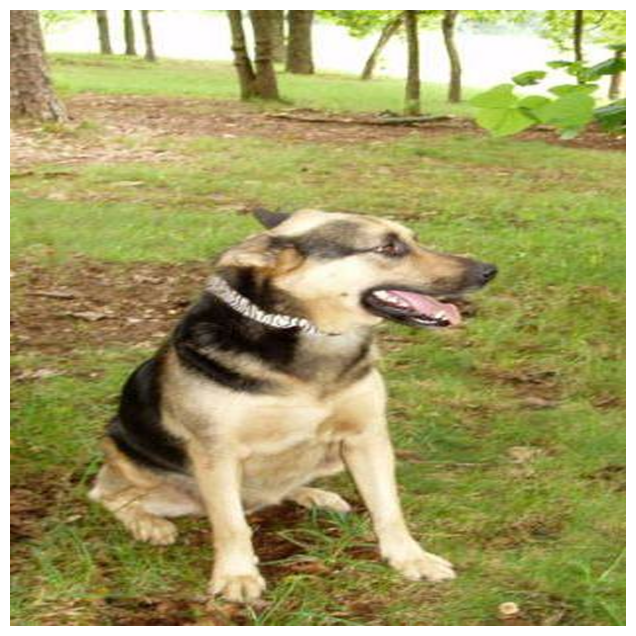

In [35]:
img_resized = cv2.resize(img, (5000,5000), interpolation=cv2.INTER_CUBIC)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
plt.show()

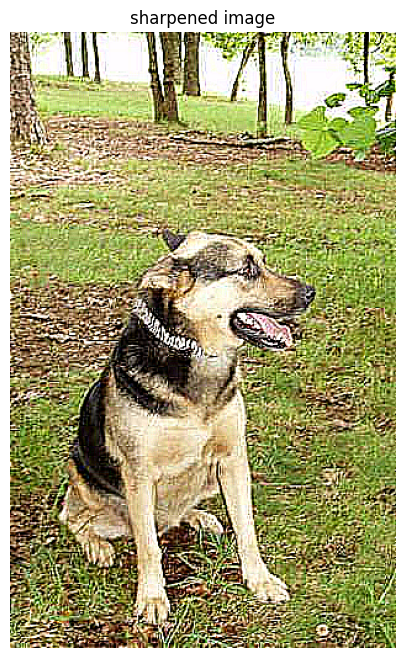

In [36]:
# Sharpen Image

kernel_sharpening = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])

sharpened = cv2.filter2D(img, -1, kernel_sharpening)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('sharpened image')
plt.show()

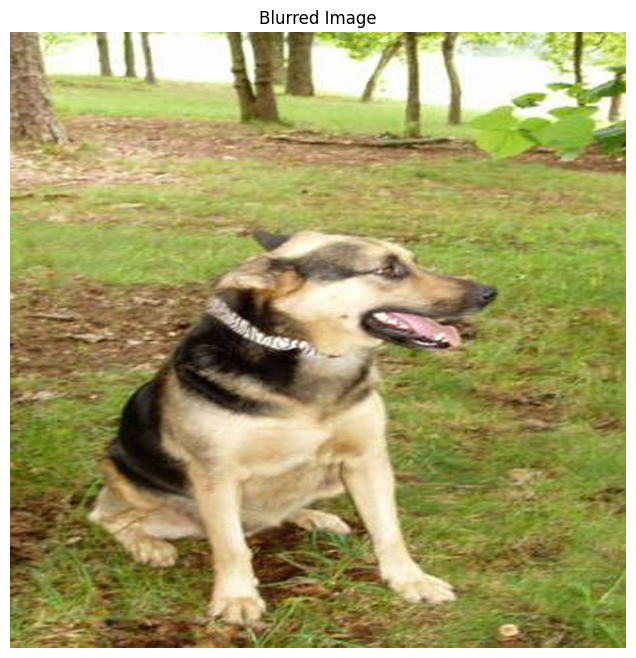

In [39]:
# Blurring the image

kernel_3x3 = np.ones((3,3), np.float32) / 9
blurred = cv2.filter2D(img, -1, kernel_3x3)
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(img_resized)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

# Save Image

In [40]:
plt.imsave('mpl_dog.png', blurred)
plt.imsave('cv2_dog.png', blurred)